# 4.7. Implementing an efficient rolling average algorithm with stride tricks

In [1]:
import numpy as np
from numpy.lib.stride_tricks import as_strided

In [2]:
def aid(x):
    # This function returns the memory
    # block address of an array.
    return x.__array_interface__['data'][0]

In [3]:
n = 5
k = 2
a = np.linspace(1, n, n)
ax = aid(a)

In [4]:
as_strided(a, (k, n), (8, 8))

array([[ 1e+000,  2e+000,  3e+000,  4e+000,  5e+000],
       [ 2e+000,  3e+000,  4e+000,  5e+000,  9e-321]])

In [5]:
def shift1(x, k):
    return np.vstack([x[i:n - k + i + 1]
                      for i in range(k)])

In [6]:
def shift2(x, k):
    return as_strided(x, (k, n - k + 1),
                      (x.itemsize, x.itemsize))

In [7]:
b = shift1(a, k)

In [8]:
b

array([[ 1.,  2.,  3.,  4.],
       [ 2.,  3.,  4.,  5.]])

In [9]:
aid(b) == ax

False

In [10]:
c = shift2(a, k)

In [11]:
c

array([[ 1.,  2.,  3.,  4.],
       [ 2.,  3.,  4.,  5.]])

In [12]:
aid(c) == ax

True

In [13]:
n, k = 1000, 10
t = np.linspace(0., 1., n)
x = t + .1 * np.random.randn(n)

In [14]:
y = shift2(x, k)
x_avg = y.mean(axis=0)

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

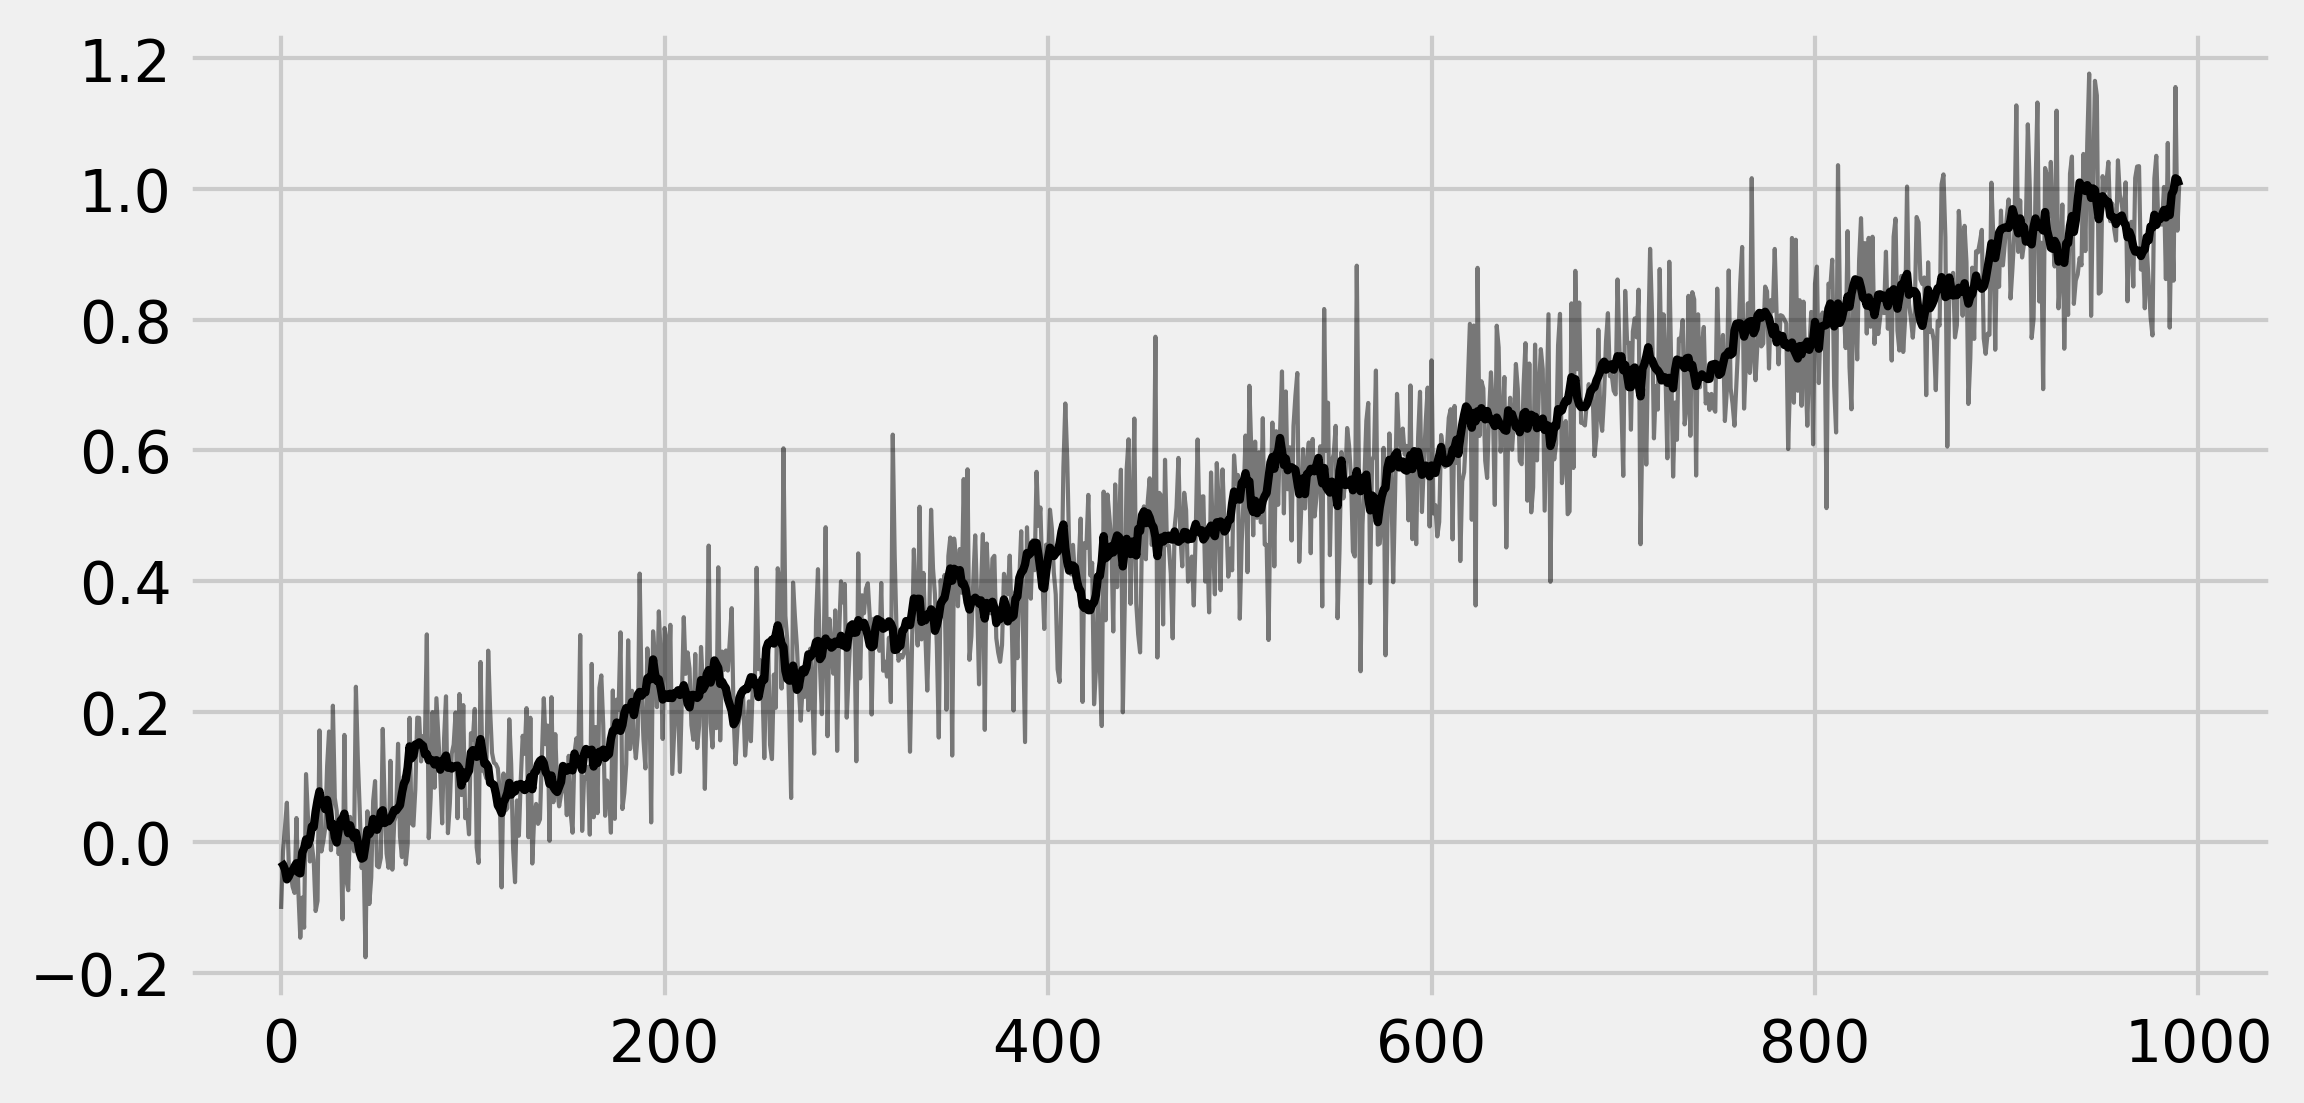

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(x[:-k + 1], '-k', lw=1, alpha=.5)
ax.plot(x_avg, '-k', lw=2)

In [17]:
%timeit shift1(x, k)

15.4 µs ± 302 ns per loop (mean ± std. dev. of 7 runs,
    100000 loops each)


In [18]:
%%timeit y = shift1(x, k)
z = y.mean(axis=0)

10.3 µs ± 123 ns per loop (mean ± std. dev. of 7 runs,
    100000 loops each)


In [19]:
%timeit shift2(x, k)

4.77 µs ± 70.3 ns per loop (mean ± std. dev. of 7 runs,
    100000 loops each)


In [20]:
%%timeit y = shift2(x, k)
z = y.mean(axis=0)

9 µs ± 179 ns per loop (mean ± std. dev. of 7 runs,
    100000 loops each)
